#Importing Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential 
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation, Dense, Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
import cv2                   
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#Importing Dataset

In [3]:
Daisy_dr = "/content/drive/MyDrive/Daisy"
Dandelion_dr = "/content/drive/MyDrive/Dandelion"
Rose_dr = "/content/drive/MyDrive/Rose"
Sunflower_dr = "/content/drive/MyDrive/Sunflower"
Tulip_dr = "/content/drive/MyDrive/Tulip"
IMG_SIZE=150
X = []
Z = []

In [4]:
def assign_label(img,flower_type):
    return flower_type

In [5]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
make_train_data('Daisy', Daisy_dr)
print(len(X))

100%|██████████| 764/764 [00:15<00:00, 50.86it/s]

764


In [7]:
make_train_data('Sunflower', Sunflower_dr)
print(len(X))

100%|██████████| 733/733 [00:17<00:00, 42.68it/s] 

1497


In [8]:
make_train_data('Dandelion', Dandelion_dr)
print(len(X))

100%|██████████| 1062/1062 [00:27<00:00, 39.08it/s] 

2559


In [9]:
make_train_data('Tulip', Tulip_dr)
print(len(X))

100%|██████████| 984/984 [00:22<00:00, 44.39it/s] 

3543


In [10]:
make_train_data('Rose', Rose_dr)
print(len(X))

100%|██████████| 784/784 [00:14<00:00, 53.58it/s] 

4327


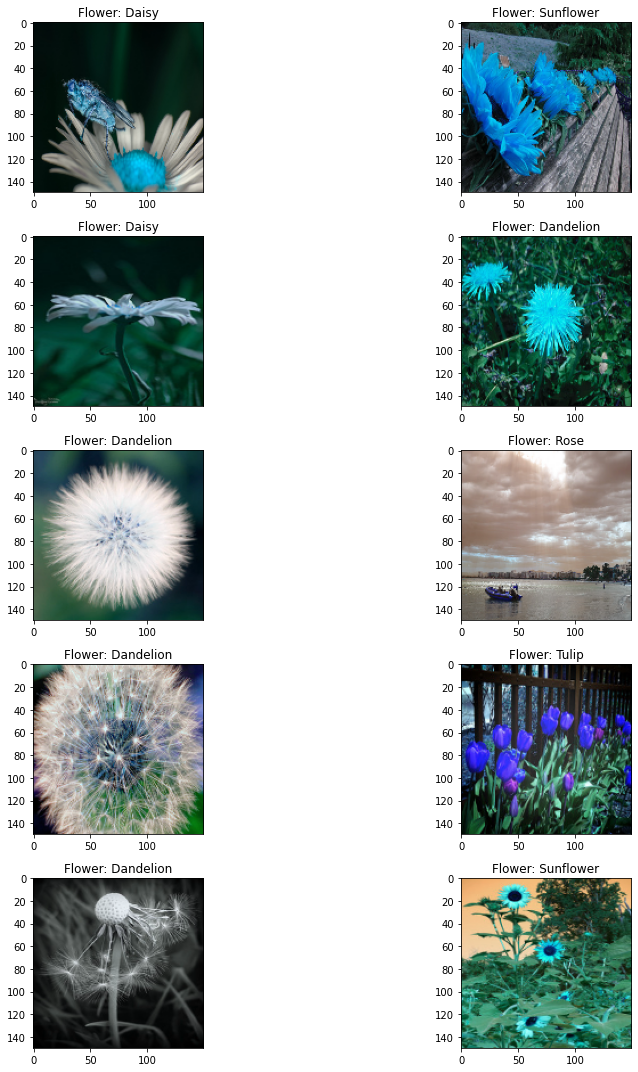

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [12]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [14]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

#Building Model

In [15]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [17]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [18]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  

In [20]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [22]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 184s 7s/step - loss: 1.4724 - accuracy: 0.3388 - val_loss: 1.2362 - val_accuracy: 0.4769
Epoch 2/50
25/25 [==============================] - 187s 7s/step - loss: 1.1874 - accuracy: 0.4674 - val_loss: 1.1428 - val_accuracy: 0.5268
Epoch 3/50
25/25 [==============================] - 186s 7s/step - loss: 1.0976 - accuracy: 0.5608 - val_loss: 1.0428 - val_accuracy: 0.6035
Epoch 4/50
25/25 [==============================] - 184s 7s/step - loss: 1.0218 - accuracy: 0.5926 - val_loss: 1.0006 - val_accuracy: 0.6081
Epoch 5/50
25/25 [==============================] - 186s 7s/step - loss: 0.9473 - accuracy: 0.6195 - val_loss: 0.9617 - val_accuracy: 0.6248
Epoch 6/50
25/25 [==============================] - 185s 8s/step - loss: 0.9192 - accuracy: 0.6394 - val_loss: 0.9435 - val_accuracy: 0.6414
Epoch 7/50
25/25 [==============================] - 187s 7s/step - loss: 0.8891 - accuracy: 0.6513 - val_loss: 0.9162 - val_accuracy: 0.6691
Epoch 8/50
25

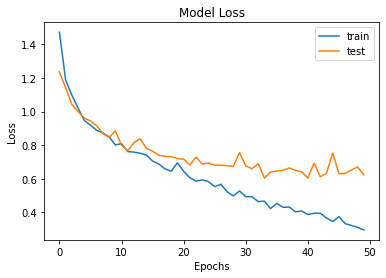

In [23]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

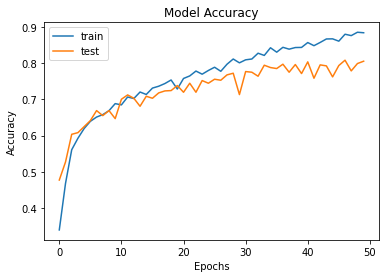

In [26]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [43]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 [==============================] - 14s 412ms/step


In [64]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

#Correctly Classified Flower Images

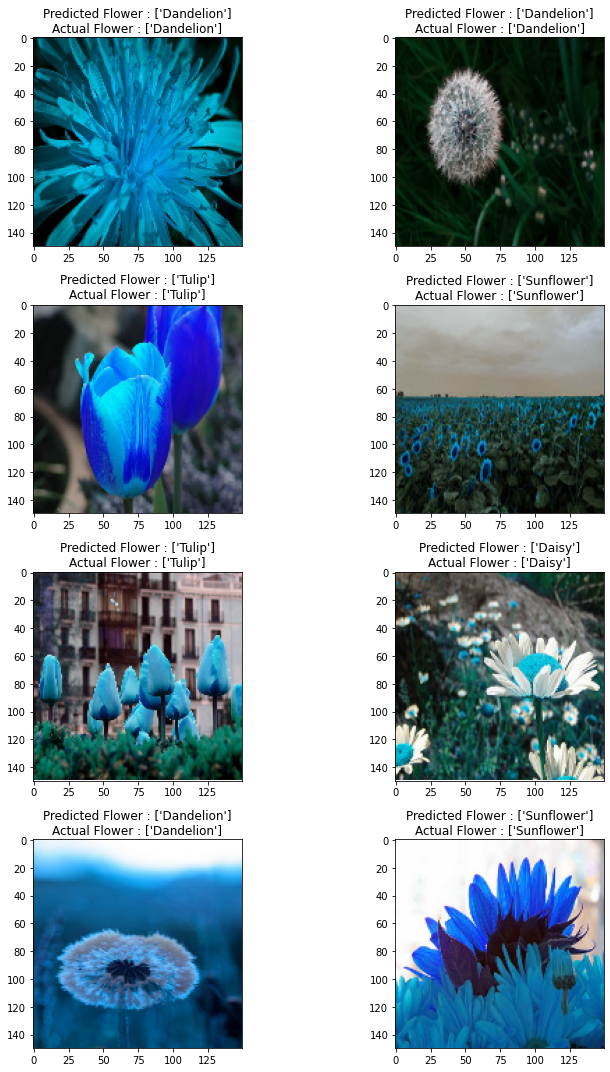

In [65]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

#Misclassified Images of Flowers

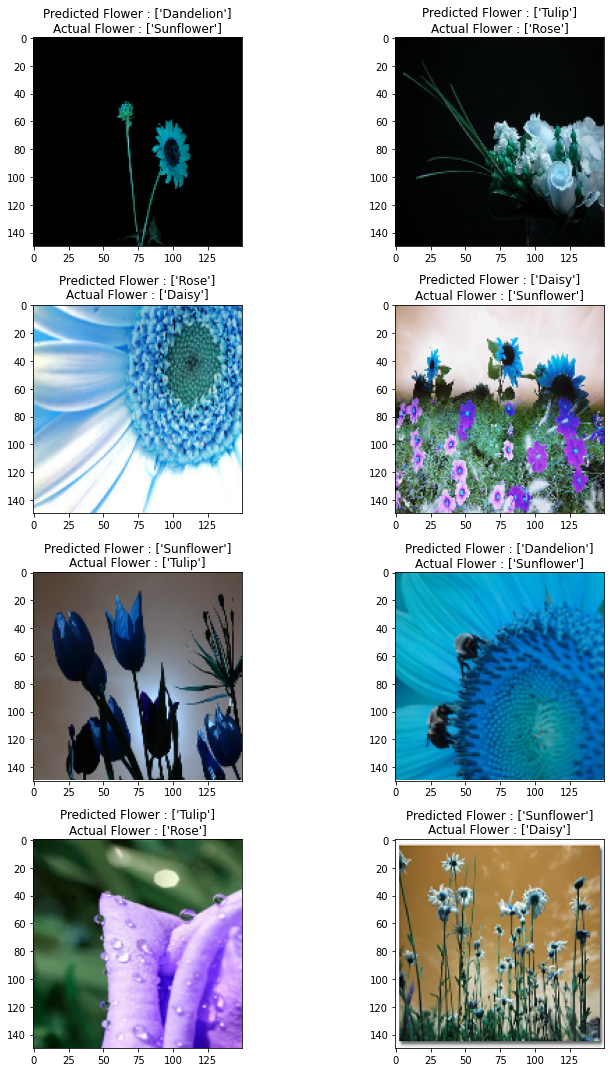

In [66]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [ ]:
# My model accuracy is 0.8059

In [79]:
import pickle as pkl
filename = 'CNN_Model.pkl'
pkl.dump(model, open(filename, 'wb'))

In [84]:
cvscores = []
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
 
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 80.59%
80.59% (+/- 0.00%)
